# SPO projektni zadatak
## Priprema okruzenja
Potreban nam je iPython (Jupter), te moduli `pandas`, `matplotlib`, `scipy`

## Projekt

Raditi cemo na datasetu student-por.csv (Portuguese language course) posto on
ima 650 stavki dok student-mat.csv ima samo 396, od cega je 382 studenata
zajednicko izmedu setova podataka.

Za pocetak cemo ucitati podatke iz datoteke i priazati prvih 3 zapisa za studente svake skole,
"GP" - Gabriel Pereira i "MS" - Mousinho da Silveira.

In [2]:
import pandas as pd

path='dataset/student-por.csv'
df = pd.read_csv(path, sep=';')

df.groupby('school').head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
423,MS,F,16,U,GT3,T,1,3,at_home,other,...,4,3,3,1,3,5,11,10,11,11
424,MS,F,16,R,GT3,T,2,2,other,other,...,4,4,4,1,1,5,0,12,12,12
425,MS,F,15,R,GT3,T,1,1,at_home,services,...,4,1,3,1,1,2,6,10,10,10


Nadalje moramo provjeriti imamo li nedostajucih vrijednosti.

In [3]:
df.isnull().values.any()

False

Provjerom otkrivamo kako nema nedostajućih vrijednosti.
Dataset je potpun. U slucaju da su postojale nedostajuce
vrijednosti iskoristili bi jednu od prikladnih metoda
za nedostajuce vrijednosti.

Jedna od metoda je rekodiranje nedostajućih vrijednosti
npr  .null. -> "missing" no nemamo nedostajucih vrijednosti
u datasetu.

Da bismo bolje upoznali obiljezja varijabli i opcenito se bolje 
upoznali sa setom podataka racunamo temeljna statisticka obiljezja
te mozemo i iscrtati historgrame za podatke:

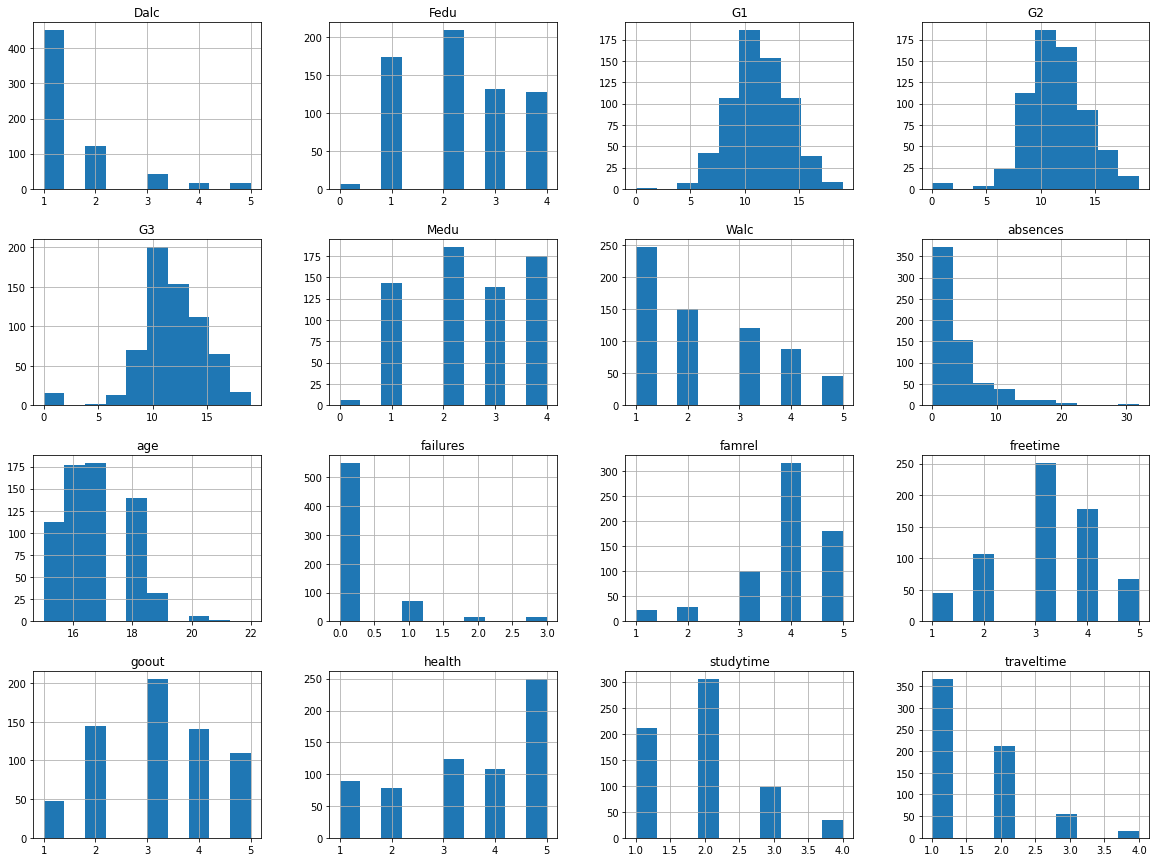

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
from pandas import DataFrame
import matplotlib.pyplot as plt

df.hist(figsize=(20, 15))
plt.show()

frame=DataFrame(df)
frame.describe()

Vidimo kako se radi o kompaktnoj distribuciji (jako niske standardne devijacije, 
i malena razlika izmedu min i max).

Dalc prestavlja unos alkohola tjekom radnog tjedna (1 jako malo, 5 jako puno),
vidimo kako jako malen studenata pije vece kolicine alkohola tjekom tjedna.
Wikiendom se broj studenata koji pije vecu kolicinu alkohola znatno povecava
(Walc, 1 jako malo, 5 jako puno.)

Fedu i Medu predstavljaju ocevu i majcinu razinu edukacije, koje su u ovom setu
podataka slicne, uz nesto veci stupanj vise edukacije oceva.

G1, G2, G3 su ocjene iz portugalskog na skali od 0 do 20, gdje je G1 first period grade,
G2 second period grade i G3 final grade.

    {todo: expand me with rest of histogram descriptions}
    
Promotrimo jos z vrijednosti ja brojcane stupce:

In [21]:
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].apply(zscore)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-4.155470,-0.195820,-0.280658
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.874570,-0.195820,-0.280658
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.219064,0.491137,0.029116
3,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,0.948153,0.834615,0.648663
4,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.789159,-0.145481,0.491137,0.338889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.853254,-0.453954,0.630866,-0.760032,1.290114,1.312667,1.119748,0.780478,-1.008546,-0.543555,-0.218508,1.012903,0.073433,-0.510025,-0.195820,-0.590431
645,1.031695,0.428131,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-1.754987,0.073433,1.312697,1.178093,1.268209
646,1.031695,-1.336039,-1.188832,0.576718,0.083653,-0.374305,-3.068820,-2.075896,-1.859711,-0.543555,-0.997695,1.012903,0.504730,-0.145481,0.147659,-0.900204
647,0.210137,0.428131,-1.188832,0.576718,-1.122808,-0.374305,-2.021678,0.780478,1.544950,1.620662,1.339864,-1.063015,0.504730,-0.510025,-0.539298,-0.590431


te zaobljenost te simetricnost distribucije:

In [5]:
frame.kurt()

age           0.071509
Medu         -1.260619
Fedu         -1.109241
traveltime    1.108865
studytime     0.037846
failures      9.824409
famrel        1.348973
freetime     -0.396959
goout        -0.865454
Dalc          4.349297
Walc         -0.770689
health       -1.121175
absences      5.781078
G1            0.036638
G2            1.662465
G3            2.712204
dtype: float64

In [6]:
frame.skew()

age           0.416795
Medu         -0.029950
Fedu          0.215343
traveltime    1.247648
studytime     0.699619
failures      3.092699
famrel       -1.105934
freetime     -0.181277
goout        -0.008580
Dalc          2.141913
Walc          0.635904
health       -0.500656
absences      2.020694
G1           -0.002774
G2           -0.360283
G3           -0.912909
dtype: float64

Ovom analizom zelimo predvjeti G3 (final grade) te otkriti korelaciju zavrsne
ocjene sa ostalim varijablama. Primjerice, utjece li konzumacija alkohola, broj izlazaka
sa prijateljima, broj izostanaka ili zdravlje na finalne rezultate?

Druga interesantna pitanja su utjece li vrijeme putovanja do skole, romanticna
veza ili odnos sa clanovima obitelji na broj izostanaka?

Promotrimo:

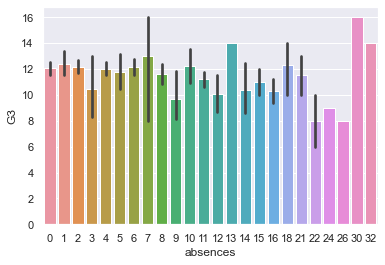

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

plt.figure()
sns.barplot('absences', 'G3', data = df)

Izračunati korelacije svake varijable izražene kroz Z vrijednost i  kategorizirane u razrede <-3, (-3 do 3), >3 s ciljnom varijablom

## IV, WoE izracuni

Izračunati IV, WoE za svaku varijablu i prikazati u Jupyter Notebooku

Izdvojiti varijable sa najjačim IV-om i prikazati grafički WoE graf za sve najjače varijable

Grupirati razrede po kriteriju WoE za najjače varijable

Objasniti što ste spoznali temeljem ove analize (profili, uzroci, uzročno posljedične veze)

Predložite kako biste riješili problem vezano uz vaš skup podataka temeljem  IV, WoE analize (što bi trebalo mijenjati, raditi drugačije, gdje je problem uzrok problema, koji su rizični profili ... )